In [0]:
#https://archive.ics.uci.edu/ml/datasets/spambase

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
from keras import optimizers
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os

%matplotlib inline

In [0]:
import urllib.request
def load_spam_data(train_size=0.70,val_size=0.15):
  with urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data') as file:
    data= np.array(pd.read_csv(file))
    print(data.shape)
  np.random.shuffle(data)
  x_train = data[0:int(data.shape[0]*train_size),0:57]
  y_train = data[0:int(data.shape[0]*train_size),57]
  x_val = data[int(data.shape[0]*train_size):int(data.shape[0]*(train_size+val_size)),0:57]
  y_val = data[int(data.shape[0]*train_size):int(data.shape[0]*(train_size+val_size)),57]
  x_test = data[int(data.shape[0]*(train_size+val_size)):data.shape[0],0:57]
  y_test = data[int(data.shape[0]*(train_size+val_size)):data.shape[0],57]

  return x_train,y_train,x_val,y_val,x_test,y_test


In [10]:
num_classes = 2
x_train,y_train,x_val,y_val,x_test,y_test = load_spam_data()

(4600, 58)


In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(3220, 57)
(3220,)
(690, 57)
(690,)
(690, 57)
(690,)


In [0]:
from sklearn.preprocessing import normalize
x_train_normed = normalize(x_train, axis=0, norm='max')
x_val_normed = normalize(x_val, axis=0, norm='max')
x_test_normed = normalize(x_test, axis=0, norm='max')

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

In [14]:
from keras.optimizers import Adam
from keras import regularizers



model = Sequential()
model.add(Dense(250,input_shape=(57,),activation='relu'))
model.add(Dense(220,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(180,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(100,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(num_classes,activation='softmax'))


# initiate RMSprop optimizer
#sgd = keras.optimizers.SGD(lr = 0.01, decay=1e-6, momentum=0.9, nesterov=True)
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.99, amsgrad=False)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 3220 samples, validate on 690 samples
Epoch 1/1000





3220/3220 [==============================] - 1s 272us/step - loss: 7.5360 - acc: 0.5711 - val_loss: 7.5274 - val_acc: 0.5884
Epoch 2/1000
3220/3220 [==============================] - 0s 24us/step - loss: 7.5274 - acc: 0.5811 - val_loss: 7.5173 - val_acc: 0.6000
Epoch 3/1000
3220/3220 [==============================] - 0s 22us/step - loss: 7.5174 - acc: 0.5904 - val_loss: 7.5067 - val_acc: 0.6029
Epoch 4/1000
3220/3220 [==============================] - 0s 24us/step - loss: 7.5068 - acc: 0.5966 - val_loss: 7.4958 - val_acc: 0.6145
Epoch 5/1000
3220/3220 [==============================] - 0s 24us/step - loss: 7.4959 - acc: 0.6019 - val_loss: 7.4846 - val_acc: 0.6159
Epoch 6/1000
3220/3220 [==============================] - 0s 23us/step - loss: 7.4847 - acc: 0.6034 - val_loss: 7.4733 - val_acc: 0.6145
Epoch 7/1000
3220/3220 [==

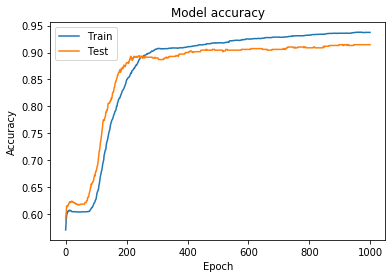

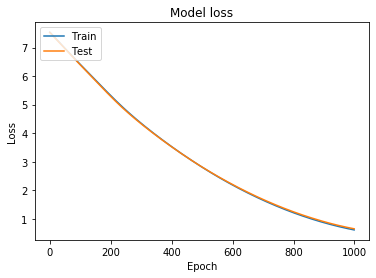

In [15]:
# Train model
batch_size = 5000

epochs = 1000

early_stopping = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=3)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x_train_normed,y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val_normed,y_val),shuffle=True,callbacks=[early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
score = model.evaluate(x=x_test_normed, y=y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

690/690 [==============================] - 0s 47us/step
acc: 94.20%


In [17]:
# save model
model.save("task2model.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
# load model
model = load_model('task2model.h5')
# summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               14500     
_________________________________________________________________
dense_2 (Dense)              (None, 220)               55220     
_________________________________________________________________
dense_3 (Dense)              (None, 180)               39780     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               18100     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 127,802
Trainable params: 127,802
Non-trainable params: 0
_________________________________________________________________
